In [13]:
# Timestamp,Response,IOType,LUN,Offset,Size

#   - Timestamp is the time the I/O was issued.
#     The timestamp is given as a Unix time (seconds since 1/1/1970) with a fractional part. 
#     Although the fractional part is nine digits, it is accurate only to the microsecond level; 
#     please  ignore the nanosecond part.  
#     If you need to process the timestamps in their original local timezone, it is UTC+0900 (JST).
#     For example:
#      > head 2016022219-LUN4.csv.gz  ← (Mon, 22 Feb 2016 19:00:00 JST)
#        1456135200.013118000 ← (Mon, 22 Feb 2016 10:00:00 GMT)       
#   - Response is the time needed to complete the I/O.
#   - IOType is "Read(R)", "Write(W)", or ""(blank).
#     The blank indicates that there was no response message.
#   - LUN is the LUN index (0,1,2,3,4, or 5).
#   - Offset is the starting offset of the I/O in bytes from the start of
#     the logical disk.
#   - Size is the transfer size of the I/O request in bytes.

In [48]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [49]:
def count_blocks(data):
    block_counter_dict = {}
    for row in data.itertuples():

        # taking block size = 4KB
        block_index = int(row.Offset / 4096)

        # using offset iterate over the next blocks
        next_blocks_count = int(row.Size / 4096)

        # Incrememnt next blocks counter
        for i in range(0, next_blocks_count):

            if (block_index+i in block_counter_dict):
                block_counter_dict[block_index+i] += 1
            else:
                block_counter_dict[block_index+i] = 1
    return block_counter_dict

# 7AM VDI Trace (1 hour)

In [16]:
# URL - http://iotta.snia.org/traces/388





# Graph References - MSR Paper - https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=4636097


# Starting Time - 2007-02-22 19:55:39.434557
# Ending Time - 2007-03-01 17:22:03.093349




# Make 3 maps, read-only, write-only, both


import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(14,40)})


data = pd.read_csv('2016022207-LUN1.csv')
data.head()
# data.shape

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456095e+09,0.006334,R,1,2091074305536,4096
1,1.456095e+09,0.005990,R,1,2091613339648,4096
2,1.456095e+09,0.004338,R,1,2091114615808,4096
3,1.456095e+09,0.000353,R,1,4699113424896,32768
4,1.456095e+09,0.000320,R,1,4699117087744,32768


In [17]:
# PART 1 - All Access

block_counter_dict = count_blocks(data)
    
print ("Number of blocks accessed", len(block_counter_dict))
print ("Sum of all the block accesses", sum(block_counter_dict.values()))
# print (block_counter_dict)


# for key in sorted(block_counter_dict):
#     print ("%s: %s" % (key, block_counter_dict[key]))

sorted_block_counter_dict = collections.OrderedDict(sorted(block_counter_dict.items()))
# print(sorted_block_counter_dict)

# print(sorted(block_counter_dict.values(), reverse=True))

Number of blocks accessed 25106
Sum of all the block accesses 29007


In [18]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict.values(), reverse=True))
print_df.head

<bound method NDFrame.head of         0
0      57
1      56
2      51
3      50
4      46
...    ..
25101   1
25102   1
25103   1
25104   1
25105   1

[25106 rows x 1 columns]>

In [19]:
df = pd.DataFrame(sorted_block_counter_dict, index=[1])
# df = pd.DataFrame.from_dict(sorted_block_counter_dict.items(), orient='index')
sorted_df = pd.DataFrame.from_dict(sorted_block_counter_dict, orient='index')

print(sorted_df)

            0
42733888    1
43606975    1
45859534    1
45859535    1
45859536    1
...        ..
1157312541  6
1157312542  6
1157407380  1
1157407382  1
1157407384  1

[25106 rows x 1 columns]


In [20]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(sorted_df)

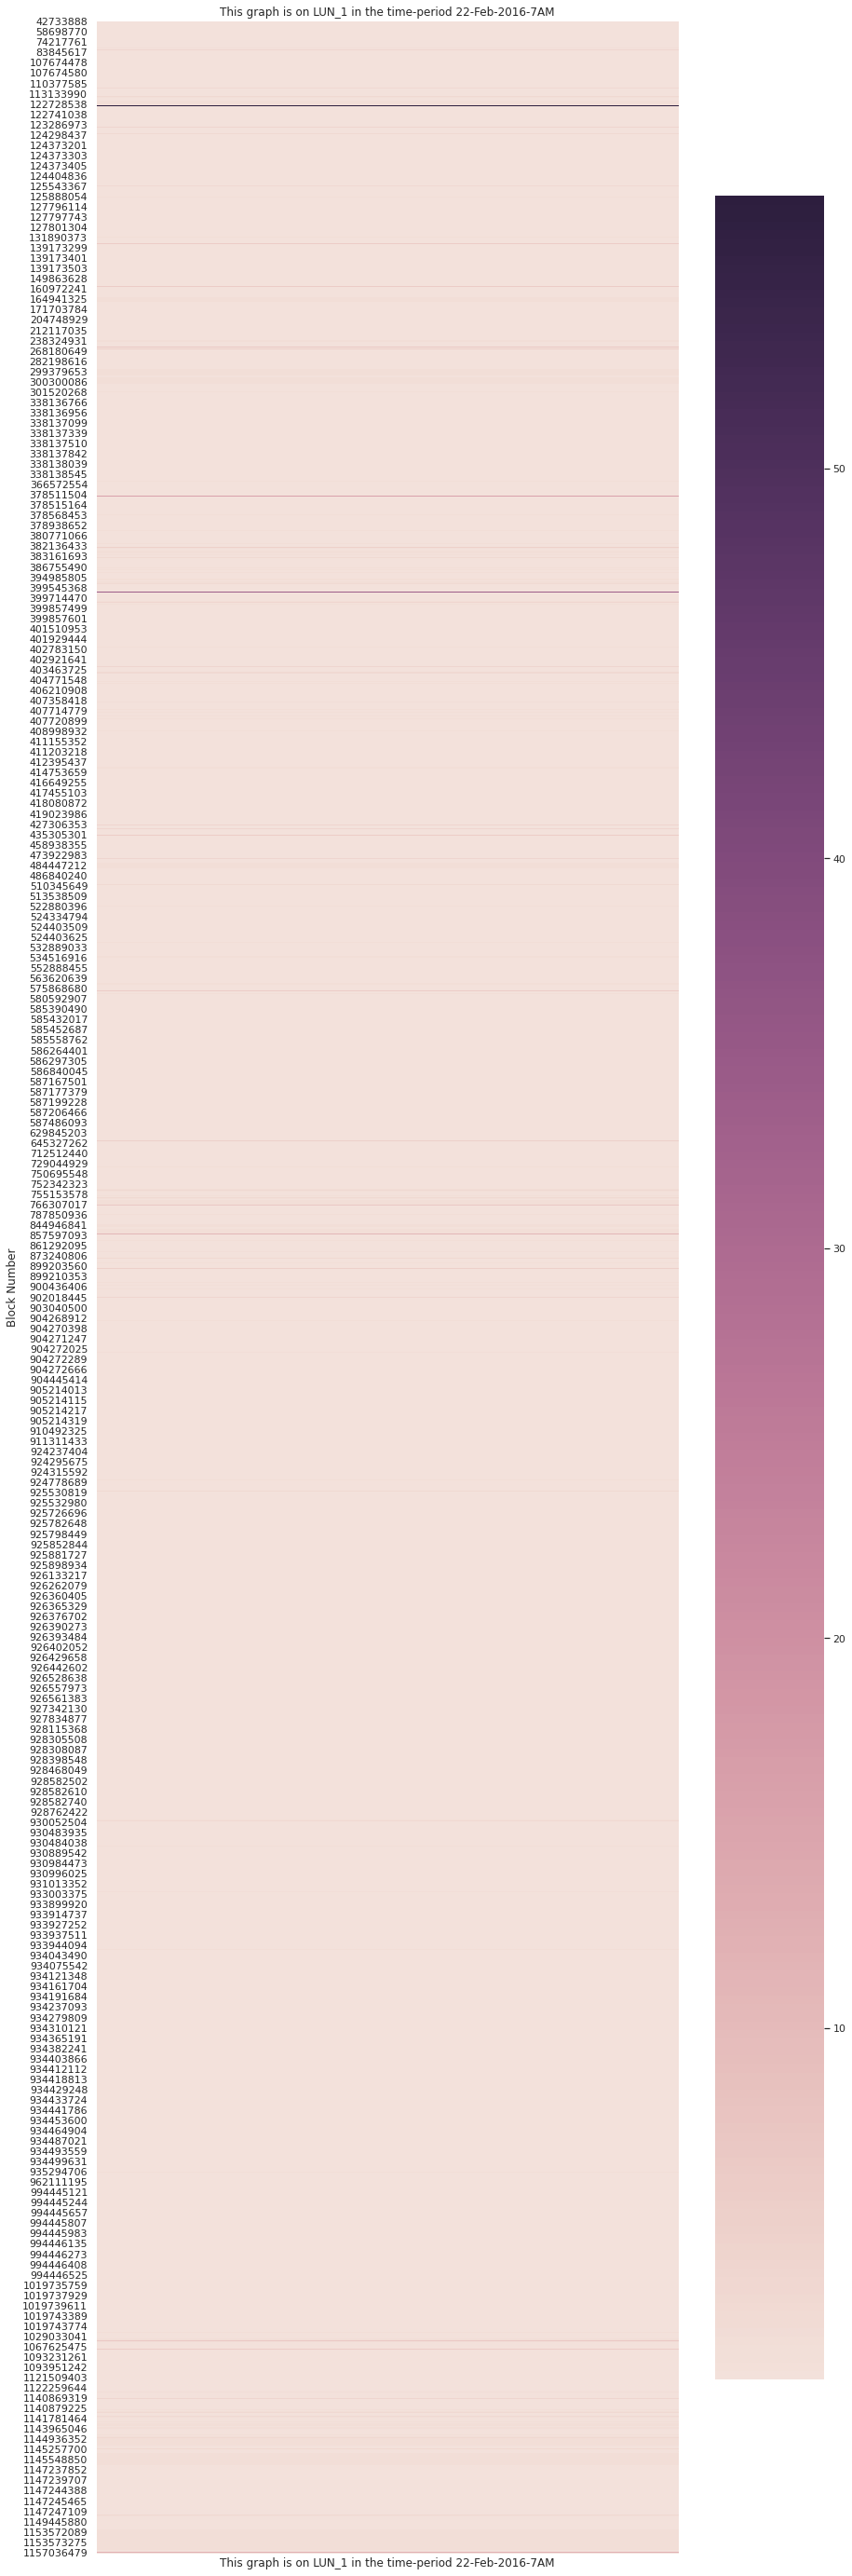

In [21]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_1 in the time-period 22-Feb-2016-7AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_1 in the time-period 22-Feb-2016-7AM')
plt.show()


# 8AM VDI Trace (1 hour)

In [24]:
import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt

data_2 = pd.read_csv('2016022208-LUN1.csv')
data_2.head()

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456096e+09,0.000147,R,1,2852192342528,32768
1,1.456096e+09,0.000162,R,1,2852192375296,32768
2,1.456096e+09,0.000141,W,1,3081594160128,4096
3,1.456096e+09,0.000161,R,1,2852192408064,32768
4,1.456096e+09,0.000165,R,1,2852192440832,32768


In [28]:
block_counter_dict_2 = count_blocks(data_2)
    

print ("Number of blocks accessed", len(block_counter_dict_2))
print ("Sum of all the block accesses", sum(block_counter_dict_2.values()))
# print (block_counter_dict_2)

# for key in sorted(block_counter_dict_2):
#     print ("%s: %s" % (key, block_counter_dict_2[key]))

sorted_block_counter_dict_2 = collections.OrderedDict(sorted(block_counter_dict_2.items()))
# print(sorted_block_counter_dict_2)
# print(sorted(block_counter_dict_2.values(), reverse=True))



Number of blocks accessed 4844246
Sum of all the block accesses 6657758


In [29]:

# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_2.values(), reverse=True))
print_df[:20]

,0
0,2402
1,2400
2,1385
3,1383
4,1219
5,1218
6,1100
7,1100
8,1095
9,1094


In [30]:
# df = pd.DataFrame(sorted_block_counter_dict_2, index=[1])
sorted_df_2 = pd.DataFrame.from_dict(sorted_block_counter_dict_2, orient='index')

print(sorted_df_2)

            0
33049       2
101951      1
102062      1
533408      1
533409      1
...        ..
1158035191  1
1158317516  1
1158317517  1
1158317518  1
1158317519  1

[4844246 rows x 1 columns]


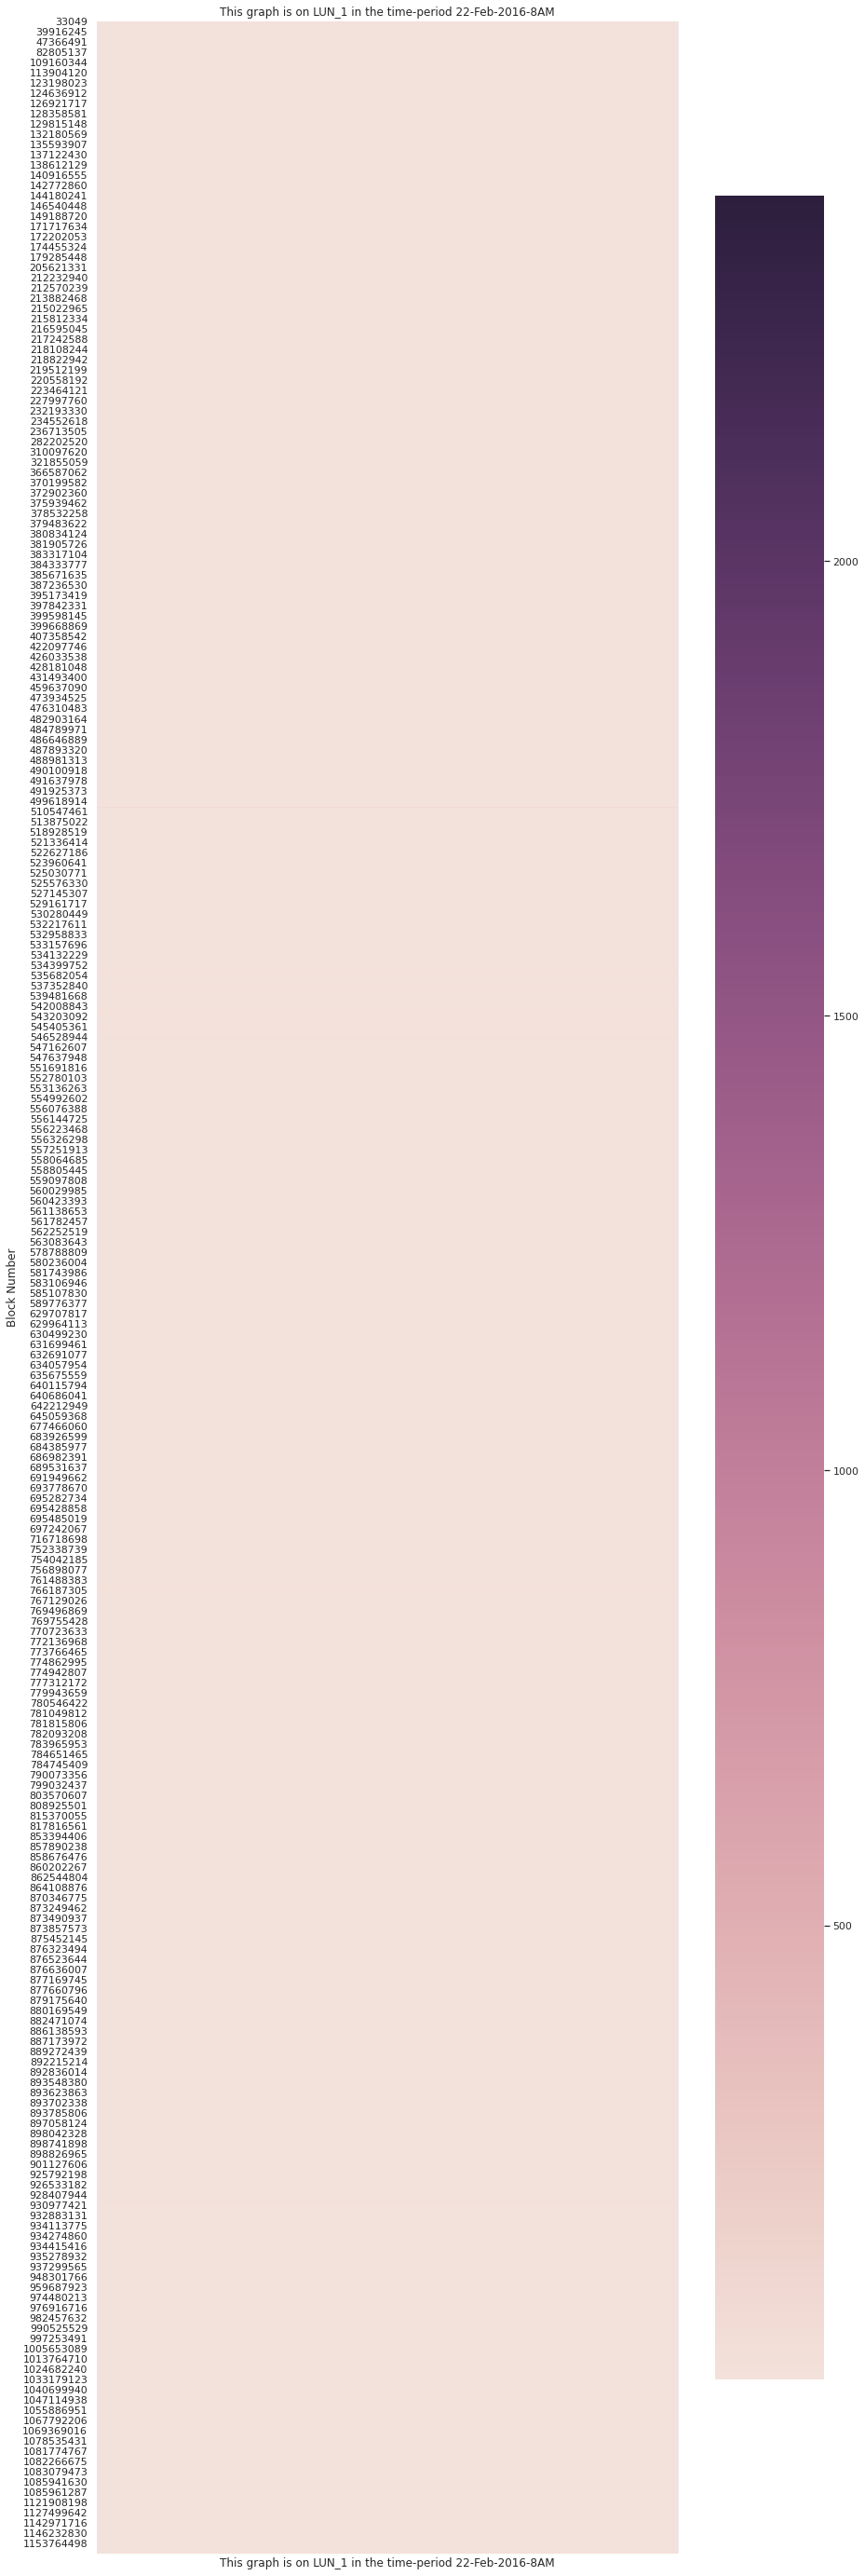

In [31]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df_2, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_1 in the time-period 22-Feb-2016-8AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_1 in the time-period 22-Feb-2016-8AM')
plt.show()


# 9AM VDI Trace (1 hour)

In [34]:
# LUN0 for Hour-9

import pandas as pd
import math
import collections
from datetime import dnatetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_3 = pd.read_csv('2016022209-LUN1.csv')
data_3.head()

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456099e+09,0.000368,R,1,1762643714560,32768
1,1.456099e+09,0.008138,R,1,3214338343424,8192
2,1.456099e+09,0.000481,R,1,3214338437632,24576
3,1.456099e+09,0.000199,R,1,3214320267776,4096
4,1.456099e+09,0.007260,R,1,1762643894784,32768


In [35]:
block_counter_dict_3 = count_blocks(data_3)
    

print ("Number of blocks accessed", len(block_counter_dict_3))
print ("Sum of all the block accesses", sum(block_counter_dict_3.values()))
# print (block_counter_dict_3)

# for key in sorted(block_counter_dict_3):
#     print ("%s: %s" % (key, block_counter_dict_3[key]))

sorted_block_counter_dict_3 = collections.OrderedDict(sorted(block_counter_dict_3.items()))
# print(sorted_block_counter_dict_3)
# print(sorted(block_counter_dict_3.values(), reverse=True))



Number of blocks accessed 21516377
Sum of all the block accesses 30219696


In [36]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_3.values(), reverse=True))
print_df[:20]

,0
0,2771
1,2769
2,2711
3,2709
4,2248
5,2247
6,2053
7,2053
8,2053
9,2052


In [37]:
# df = pd.DataFrame(sorted_block_counter_dict_3, index=[1])
sorted_df_3 = pd.DataFrame.from_dict(sorted_block_counter_dict_3, orient='index')

print(sorted_df_3)

             0
33049       10
56621        1
56747        1
56748        1
101951       1
...         ..
1158464083   1
1158464084   1
1158464085   1
1158464086   1
1158464087   1

[21516377 rows x 1 columns]


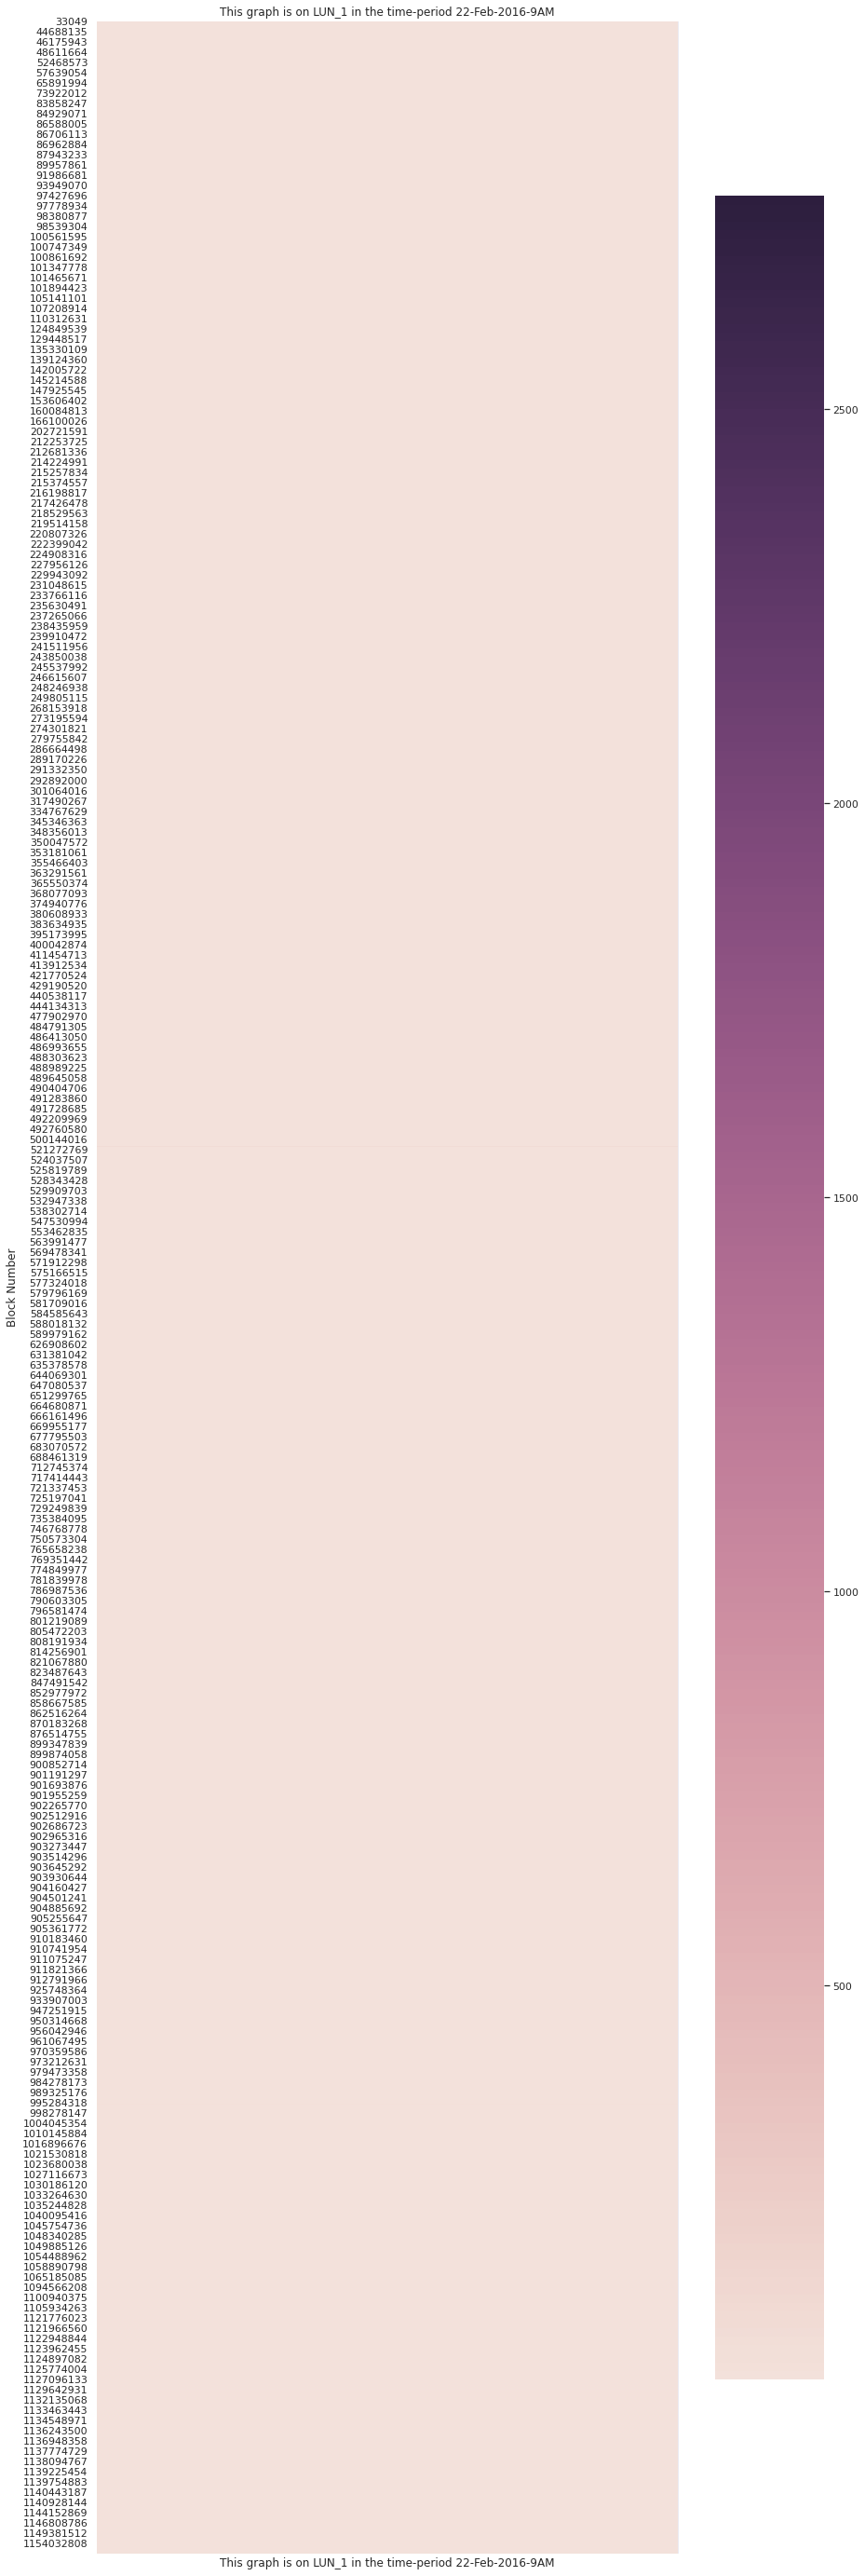

In [38]:
sns.set(rc={'figure.figsize':(14,50)})
cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)

heatmap = sns.heatmap(sorted_df_3, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_1 in the time-period 22-Feb-2016-9AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_1 in the time-period 22-Feb-2016-9AM')
plt.show()

# 10AM VDI Trace (1 hour)

In [41]:
# LUN0 for Hour-9

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_4 = pd.read_csv('2016022210-LUN1.csv')
data_4[:20]

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456103e+09,0.003600,R,1,670859688960,16384
1,1.456103e+09,0.004222,R,1,3691175675392,1024
2,1.456103e+09,0.000059,R,1,2311202872832,4096
3,1.456103e+09,0.006767,R,1,678560111104,1536
4,1.456103e+09,0.000054,R,1,2311202876928,4096
5,1.456103e+09,0.007738,R,1,3694738803712,1024
6,1.456103e+09,0.000194,R,1,2964898407424,4096
7,1.456103e+09,0.010306,R,1,3989606690304,4096
8,1.456103e+09,0.025426,R,1,3798566959616,4096
9,1.456103e+09,0.007274,R,1,4155311190528,7168


In [42]:
block_counter_dict_4 = count_blocks(data_4)
    

print ("Number of blocks accessed", len(block_counter_dict_4))
print ("Sum of all the block accesses", sum(block_counter_dict_4.values()))
# print (block_counter_dict_4)

# for key in sorted(block_counter_dict_4):
#     print ("%s: %s" % (key, block_counter_dict_4[key]))

sorted_block_counter_dict_4 = collections.OrderedDict(sorted(block_counter_dict_4.items()))
# print(sorted_block_counter_dict_4)
# print(sorted(block_counter_dict_4.values(), reverse=True))



Number of blocks accessed 21720717
Sum of all the block accesses 27402006


In [43]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_4.values(), reverse=True))
print_df[:20]

,0
0,4392
1,4389
2,3383
3,2814
4,2812
5,2615
6,2613
7,2298
8,1592
9,1591


In [44]:
# df = pd.DataFrame(sorted_block_counter_dict_4, index=[1])
sorted_df_4 = pd.DataFrame.from_dict(sorted_block_counter_dict_4, orient='index')

print(sorted_df_4)

            0
33049       9
33050       1
33051       1
33052       1
33053       1
...        ..
1158464320  1
1158464321  1
1158464322  1
1158464323  1
1158464324  1

[21720717 rows x 1 columns]


In [47]:
# import sys
# sys.getsizeof(sorted_df_4)

347531496

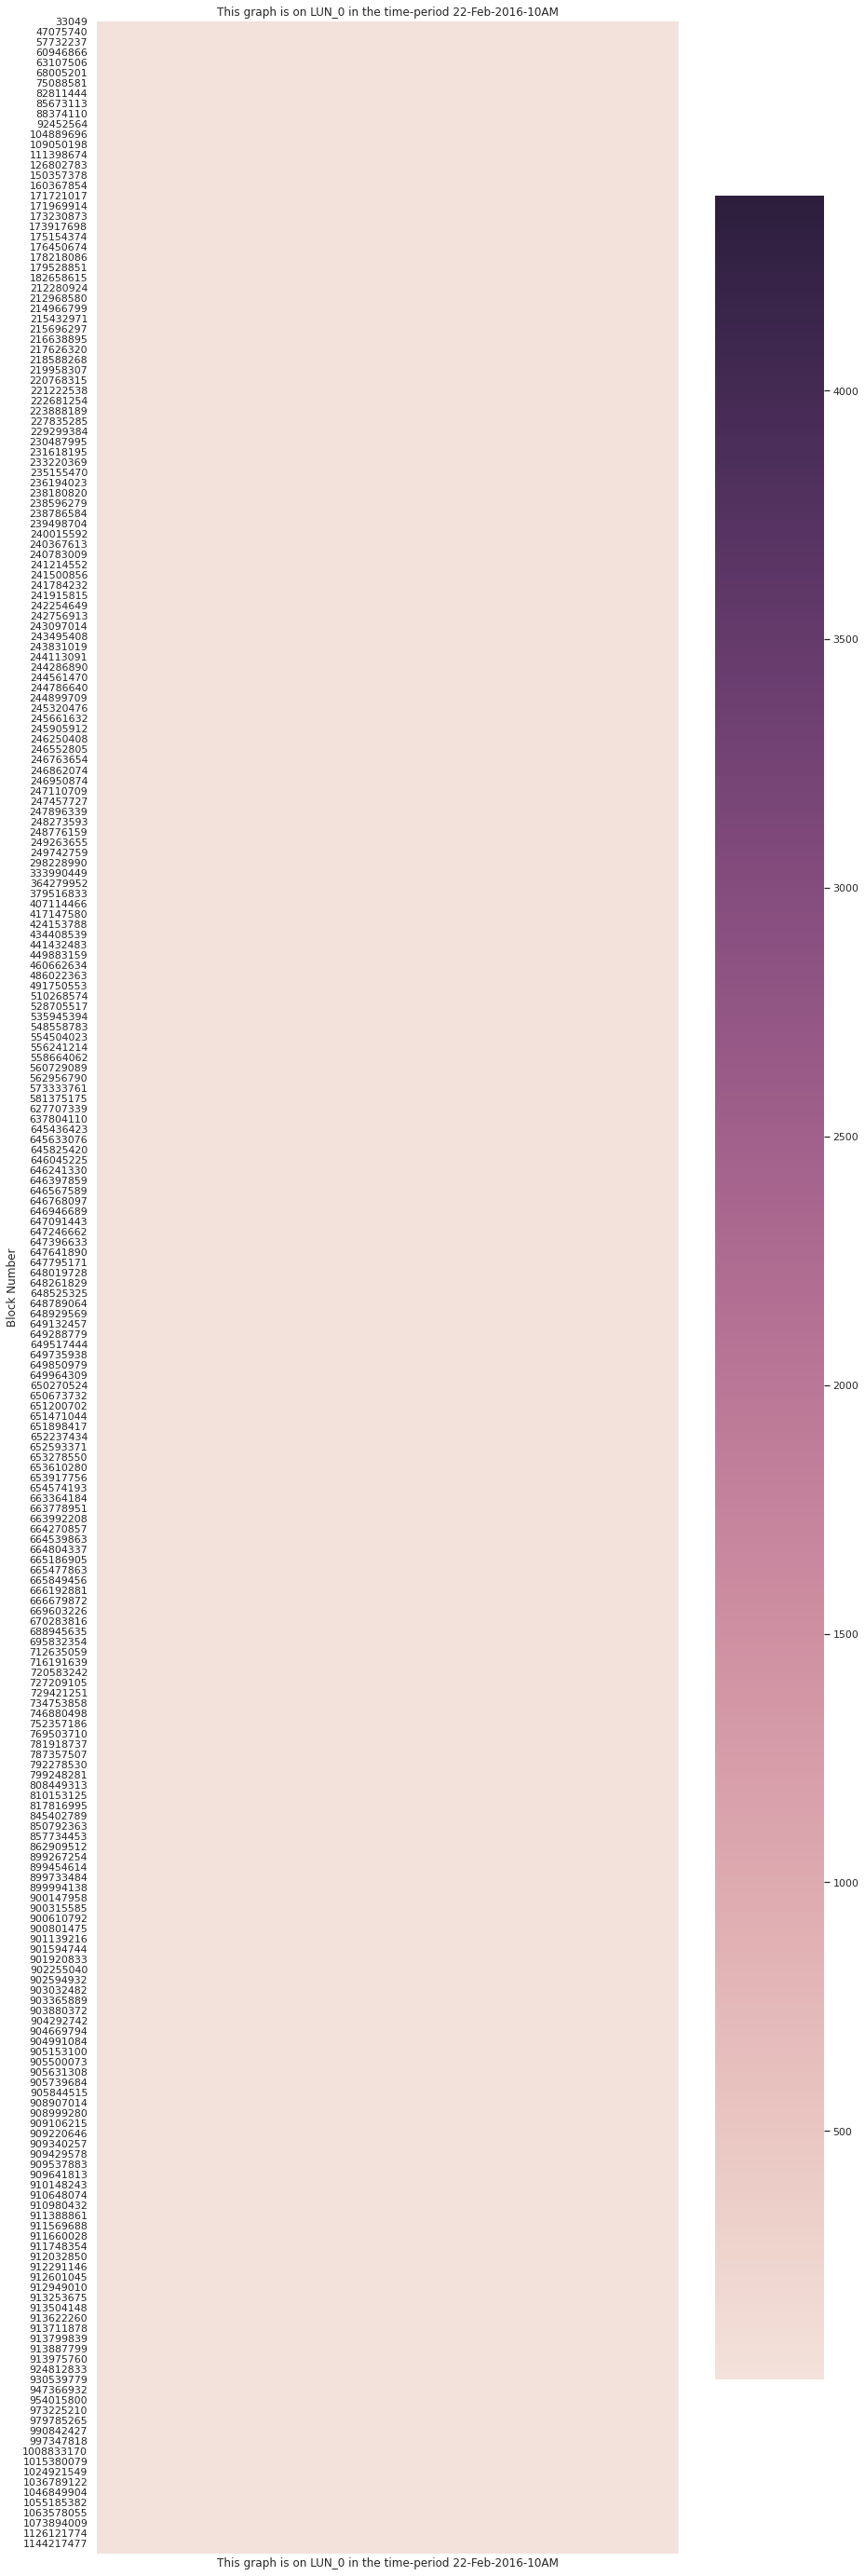

In [45]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)
# cmap_i.set_under("0.5")

heatmap = sns.heatmap(sorted_df_4, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-10AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-10AM')
plt.show()

# 11AM VDI Trace (1 hour)

In [50]:

import pandas as pd
import math
import collections
from datetime import datetime, timedelta


import seaborn as sns
import matplotlib.pyplot as plt



data_5 = pd.read_csv('2016022211-LUN1.csv')
data_5[:20]

,Timestamp,Response,IOType,LUN,Offset,Size
0,1.456106e+09,0.000220,R,1,1127802314752,4096
1,1.456106e+09,0.000052,R,1,3340504620032,4096
2,1.456106e+09,0.000102,R,1,3340504607744,4096
3,1.456106e+09,0.000647,R,1,1127802318848,4096
4,1.456106e+09,0.000757,R,1,889991128576,16384
5,1.456106e+09,0.000102,R,1,889991144960,16384
6,1.456106e+09,0.000095,R,1,889991161344,16384
7,1.456106e+09,0.000102,R,1,889991177728,16384
8,1.456106e+09,0.000170,W,1,3832751131136,4096
9,1.456106e+09,0.000169,W,1,3838955037696,512


In [51]:
block_counter_dict_5 = count_blocks(data_5)
    

print ("Number of blocks accessed", len(block_counter_dict_5))
print ("Sum of all the block accesses", sum(block_counter_dict_5.values()))
# print (block_counter_dict_5)

# for key in sorted(block_counter_dict_5):
#     print ("%s: %s" % (key, block_counter_dict_5[key]))

sorted_block_counter_dict_5 = collections.OrderedDict(sorted(block_counter_dict_5.items()))
# print(sorted_block_counter_dict_5)
# print(sorted(block_counter_dict_5.values(), reverse=True))



Number of blocks accessed 16651707
Sum of all the block accesses 21085492


In [52]:
# #  print(sorted(block_counter_dict.values(), reverse=True))
print_df = pd.DataFrame(sorted(block_counter_dict_5.values(), reverse=True))
print_df[:20]

,0
0,3336
1,3336
2,2473
3,2473
4,1903
5,1902
6,1614
7,1614
8,1362
9,1361


In [53]:
# df = pd.DataFrame(sorted_block_counter_dict_4, index=[1])
sorted_df_5 = pd.DataFrame.from_dict(sorted_block_counter_dict_5, orient='index')

print(sorted_df_5)

            0
33049       3
70816       1
70817       1
70818       1
70819       1
...        ..
1158464049  1
1158464050  1
1158464051  1
1158464052  1
1158464079  1

[16651707 rows x 1 columns]


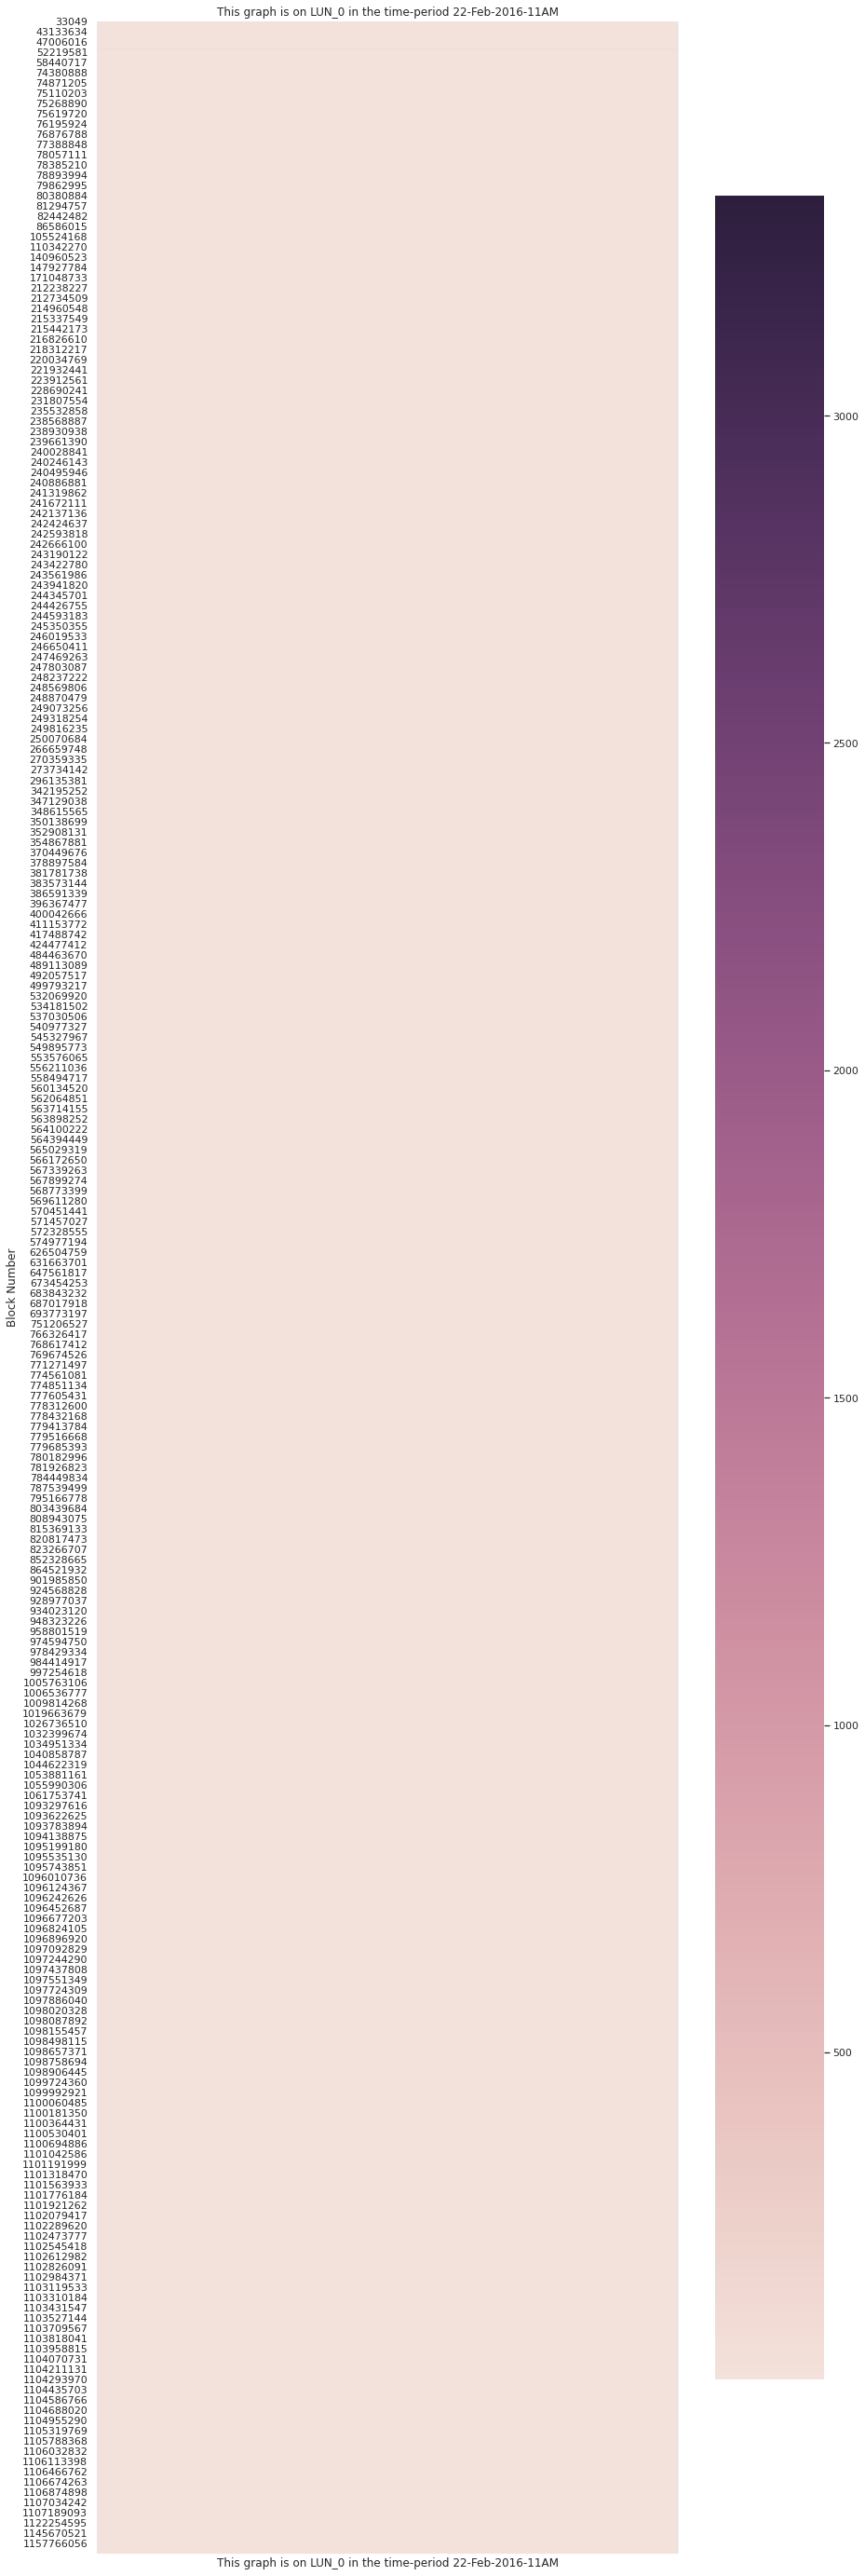

In [54]:
sns.set(rc={'figure.figsize':(14,50)})

cmap_i = sns.cubehelix_palette(as_cmap=True, light=.9)
# cmap_i.set_under("0.5")

heatmap = sns.heatmap(sorted_df_5, cmap=cmap_i, xticklabels=False)
plt.xlabel('This graph is on LUN_0 in the time-period 22-Feb-2016-11AM')
plt.ylabel('Block Number')

plt.title('This graph is on LUN_0 in the time-period 22-Feb-2016-11AM')
plt.show()

# Extra Code (Reference purpose - No use)

In [ ]:
# Part 2 - This is time series data



# Reset all the values to zero
# new_block_dict = dict.fromkeys(sorted_block_counter_dict, 0)

result_df = pd.DataFrame()

granularity_y_axis = 1000
granularity_x_axis = 20

time_series_dict = dict.fromkeys(range(granularity_y_axis+1), 0)
flag = False
dataframe_column_count = 0

# Now keep only granularity_y_axis block_ranges on y-axis for better visualisation
block_range_size = sorted_df.index[-1] // granularity_y_axis









for i in range(0,3):
    result_df[i]





for row in data.itertuples():
    
    # print (type(convert_filetime_to_datetime(row.Timestamp)), convert_filetime_to_datetime(row.Timestamp))
    

    
    # Time visualisation can be seen in above print statement - Collect trace map for every 12hrs
    current_io_time = convert_filetime_to_datetime(row.Timestamp)
    if abs(current_io_time - set_pivot_timer) > timedelta(hours=set_hours):
        # 6 hours limit crossed, set a flag and record new entries
        flag = True
        df = pd.DataFrame.from_dict(time_series_dict, orient='index')
        result_df[dataframe_column_count] = df[0].values
        
        # update pivot timer to current one
        set_pivot_timer = current_io_time
        print ("set_pivot_timer", set_pivot_timer)
        
        dataframe_column_count += 1
        
        
        
        
        
    # Reintialize dict if just copied to dataframe    
    if flag == True:
        time_series_dict = dict.fromkeys(range(granularity_y_axis + 1), 0)
        flag = False
    
    
    
    
    
    # taking block size = 4KB    
    block_index = row.Offset // 4096
    # using offset iterate over the next blocks
    next_blocks_count = row.Size // 4096

    
    
    
    # Increment next blocks counter -------
    for i in range(0, next_blocks_count):
        time_series_dict[(block_index+i) // block_range_size] += 1
        
        
        
        
#     flag = False
    # No of time periods defined here
    if dataframe_column_count > granularity_x_axis:
        break

        
        
# loop ended, copy last time period data
if flag == False and dataframe_column_count <= granularity_x_axis:
    df = pd.DataFrame.from_dict(time_series_dict, orient='index')
    result_df[dataframe_column_count] = df[0].values
        
print (result_df)

In [ ]:
# Convert to localtime of the VDI, i.e. GMT + 9hours

def convert_unixtime_to_datetime(ft):
#     return (datetime.utcfromtimestamp(ft) + timedelta(hours=9)).strftime('%Y-%m-%d %H:%M:%S:%f')
    return (datetime.utcfromtimestamp(ft) + timedelta(hours=9)).strftime('%Y-%m-%d %H:%M:%S')


In [ ]:
sns.set(rc={'figure.figsize':(20,20)})
heatmap = sns.heatmap(result_df, cmap="YlGnBu")
plt.xlabel('Time periods (each period of %s hour(s)' % set_hours)
plt.ylabel('Block Range, each index is a collection = %d blocks, some indexes will be visible on increasing figure size in line#1' % block_range_size)

plt.title('This graph shows time-series data, i.e. temperature of block(s) over a period of time')
plt.show()


In [ ]:
print("Start time - ", convert_filetime_to_datetime(data.Timestamp[0]))
print("End time - ", convert_filetime_to_datetime(data.Timestamp[2244643]))
print(len(block_counter_dict) // 100)


In [ ]:
sorted_df.index[-1]